In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

def getImage(image):
    path = '/Users/alexandrasmith/Desktop/Digital Image Processing 793/Assignment 3/'
    im = cv2.imread(path + image, cv2.IMREAD_GRAYSCALE)
    return im

In [ ]:
# QUESTION 1
lenna = getImage('lenna256.jpg')
I_low = getImage('ilpf.bmp')
I_high = getImage('ihpf.bmp')
B_low = getImage('blpf.bmp')
B_high = getImage('bhpf.bmp')

r, c = lenna.shape
# compute DFT
F = np.fft.fftshift(np.fft.fft2(lenna))
# display purposes
Y = np.log(1 + F)
cc = 255/np.max(Y)
spectrum = np.array(cc*np.log(1 + np.abs(F)), dtype=np.uint8)
# plt.imshow(spectrum, cmap="gray")
# plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
# plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
# plt.title("DFT of lenna image")
# plt.show()

# a : Ideal
# form product elementwise
G1 = np.multiply(I_low, F)
# display purposes
# Y = np.log(1 + G1)
# cc = 255/np.max(Y)
# s = np.array(cc*np.log(1 + np.abs(G1)), dtype=np.uint8)
# plt.imshow(s, cmap="gray")
# plt.title("F*G")
# plt.show()
g1 = np.real(np.fft.ifft2(np.fft.fftshift(G1)))
# show profile of spatial kernel
I_low_s = np.fft.fftshift(np.real(np.fft.ifft2(np.fft.fftshift(I_low))))
I_high_s = np.real(np.fft.ifft2(I_high))
B_low_s = np.fft.fftshift(np.real(np.fft.ifft2(np.fft.fftshift(B_low))))
B_high_s = np.fft.fftshift(np.real(np.fft.ifft2(np.fft.fftshift(B_high))))
plt.imshow(I_low_s, cmap="gray")
plt.show()

# display resulting images
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title("Spatial kernel for ideal lowpass filter")
ax[0].imshow(I_low_s, cmap="gray")
ax[1].set_title("Spatial kernel for Butterworth lowpass filter")
ax[1].imshow(B_low_s, cmap="gray")
ax[2].set_title("Spatial kernel for ideal highpass filter")
ax[2].imshow(I_high_s, cmap="gray")
ax[3].set_title("Spatial kernel for Butterworth highpass filter")
ax[3].imshow(B_high_s, cmap="gray")
G2 = np.multiply(I_high, F)
g2 = np.real(np.fft.ifft2(np.fft.fftshift(G2)))

# b : Butterworth
G3 = np.multiply(B_low, F)
g3 = np.real(np.fft.ifft2(np.fft.fftshift(G3)))
G4 = np.multiply(B_high, F)
g4 = np.real(np.fft.ifft2(np.fft.fftshift(G4)))

# display resulting images
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title("Ideal lowpass filter, D0 = 10")
ax[0].imshow(g1, cmap="gray")
ax[1].set_title("Butterworth lowpass filter, D0 = 10, n = 2")
ax[1].imshow(g3, cmap="gray")
ax[2].set_title("Ideal highpass filter, D0 = 10")
ax[2].imshow(g2, cmap="gray")
ax[3].set_title("Butterworth highpass filter, D0 = 10, n = 2")
ax[3].imshow(g4, cmap="gray")


In [ ]:
# c
# create filter functions
D0 = 35
n = 2
H_il = np.zeros((r, c))
H_ih = np.zeros((r, c))
H_bl = np.zeros((r, c))
H_bh = np.zeros((r, c))
# construct lowpass filters
for u in range(r):
    for v in range(c):
        D = np.sqrt((u - r/2)**2 + (v - r/2)**2)
        H_bl[u][v] = 1/(1 + (D/D0)**(2*n))
        if D <= D0:
            H_il[u][v] = 1
        elif D > 0 :
            H_il[u][v] = 0
# obtain highpass filters
H_ih = 1 - H_il
H_bh = 1 - H_bl

In [ ]:
# plot filters
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Ideal low, D0 = 35')
ax[0].imshow(H_il, cmap="gray")
ax[1].set_title('Butterworth low, D0 = 35, n = 2')
ax[1].imshow(H_bl, cmap="gray")
ax[2].set_title('Ideal high, D0 = 35')
ax[2].imshow(H_ih, cmap="gray")
ax[3].set_title('Butterworth high, D0 = 35, n = 2')
ax[3].imshow(H_bh, cmap="gray")

K1 = np.multiply(H_il, F)
k1 = np.real(np.fft.ifft2(np.fft.fftshift(K1)))
K2 = np.multiply(H_bl, F)
k2 = np.real(np.fft.ifft2(np.fft.fftshift(K2)))
K3 = np.multiply(H_ih, F)
k3 = np.real(np.fft.ifft2(np.fft.fftshift(K3)))
K4 = np.multiply(H_bh, F)
k4 = np.real(np.fft.ifft2(np.fft.fftshift(K4)))

# display resulting images
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title("Ideal lowpass filter, D0 = 35")
ax[0].imshow(k1[0:r, 0:c], cmap="gray")
ax[1].set_title("Butterworth lowpass filter, D0 = 35, n = 2")
ax[1].imshow(k2[0:r, 0:c], cmap="gray")
ax[2].set_title("Ideal highpass filter, D0 = 35")
ax[2].imshow(k3[0:r, 0:c], cmap="gray")
ax[3].set_title("Butterworth highpass filter, D0 = 35, n = 2")
ax[3].imshow(k4[0:r, 0:c], cmap="gray")

In [ ]:
# different orders for Butterworth
# create filter functions
D0 = 35
H_bl2 = np.zeros((r, c))
H_bh2 = np.zeros((r, c))
H_bl4 = np.zeros((r, c))
H_bh4 = np.zeros((r, c))
H_bl7 = np.zeros((r, c))
H_bh7 = np.zeros((r, c))

# n = 2, 4, 7
for u in range(r):
    for v in range(c):
        D = np.sqrt((u - r/2)**2 + (v - r/2)**2)
        H_bl2[u][v] = 1/(1 + (D/D0)**(2*2))
        H_bl4[u][v] = 1/(1 + (D/D0)**(2*4))
        H_bl7[u][v] = 1/(1 + (D/D0)**(2*7))
H_bh2 = 1 - H_bl2
H_bh4 = 1 - H_bl4
H_bh7 = 1 - H_bl7

# plot filters
fig, ax = plt.subplots(2, 3, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0][0].set_title('Butterworth low, D0 = 35, n = 2')
ax[0][0].imshow(H_bl2, cmap="gray")
ax[1][0].set_title('Butterworth high, D0 = 35, n = 2')
ax[1][0].imshow(H_bh2, cmap="gray")
ax[0][1].set_title('Butterworth low, D0 = 35, n = 4')
ax[0][1].imshow(H_bl4, cmap="gray")
ax[1][1].set_title('Butterworth high, D0 = 35, n = 4')
ax[1][1].imshow(H_bh4, cmap="gray")
ax[0][2].set_title('Butterworth low, D0 = 35, n = 7')
ax[0][2].imshow(H_bl7, cmap="gray")
ax[1][2].set_title('Butterworth high, D0 = 35, n = 7')
ax[1][2].imshow(H_bh7, cmap="gray")

B1 = np.multiply(H_bl2, F)
b1 = np.real(np.fft.ifft2(np.fft.fftshift(B1)))
B2 = np.multiply(H_bh2, F)
b2 = np.real(np.fft.ifft2(np.fft.fftshift(B2)))
B3 = np.multiply(H_bl4, F)
b3 = np.real(np.fft.ifft2(np.fft.fftshift(B3)))
B4 = np.multiply(H_bh4, F)
b4 = np.real(np.fft.ifft2(np.fft.fftshift(B4)))
B5 = np.multiply(H_bl7, F)
b5 = np.real(np.fft.ifft2(np.fft.fftshift(B5)))
B6 = np.multiply(H_bh7, F)
b6 = np.real(np.fft.ifft2(np.fft.fftshift(B6)))

# display resulting images
fig, ax = plt.subplots(2, 3, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0][0].set_title('Butterworth low, D0 = 35, n = 2')
ax[0][0].imshow(b1, cmap="gray")
ax[1][0].set_title('Butterworth high, D0 = 35, n = 2')
ax[1][0].imshow(b2, cmap="gray")
ax[0][1].set_title('Butterworth low, D0 = 35, n = 4')
ax[0][1].imshow(b3, cmap="gray")
ax[1][1].set_title('Butterworth high, D0 = 35, n = 4')
ax[1][1].imshow(b4, cmap="gray")
ax[0][2].set_title('Butterworth low, D0 = 35, n = 7')
ax[0][2].imshow(b5, cmap="gray")
ax[1][2].set_title('Butterworth high, D0 = 35, n = 7')
ax[1][2].imshow(b6, cmap="gray")

In [ ]:
# d
P, Q = 2*r, 2*c
# zero pad image and filters
lenna_pad = cv2.copyMakeBorder(lenna, 0, P-r, 0, Q-c, cv2.BORDER_CONSTANT, value = 0)
ilp_pad = np.pad(I_low, int(r/2), 'constant')
ihp_pad = np.pad(I_high, int(r/2), 'constant')
blp_pad = np.pad(B_low, int(r/2), 'constant')
bhp_pad = np.pad(B_high, int(r/2), 'constant')

F_pad = np.fft.fftshift(np.fft.fft2(lenna_pad))

H1 = np.multiply(ilp_pad, F_pad)
h1 = np.real(np.fft.ifft2(np.fft.fftshift(H1)))
H2 = np.multiply(blp_pad, F_pad)
h2 = np.real(np.fft.ifft2(np.fft.fftshift(H2)))
H3 = np.multiply(ihp_pad, F_pad)
h3 = np.real(np.fft.ifft2(np.fft.fftshift(H3)))
H4 = np.multiply(bhp_pad, F_pad)
h4 = np.real(np.fft.ifft2(np.fft.fftshift(H4)))

# display resulting images
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title("Ideal lowpass filter, D0 = 10")
ax[0].imshow(h1[0:r, 0:c], cmap="gray")
ax[1].set_title("Butterworth lowpass filter, D0 = 10, n = 2")
ax[1].imshow(h2[0:r, 0:c], cmap="gray")
ax[2].set_title("Ideal highpass filter, D0 = 10")
ax[2].imshow(h3[0:r, 0:c], cmap="gray")
ax[3].set_title("Butterworth highpass filter, D0 = 10, n = 2")
ax[3].imshow(h4[0:r, 0:c], cmap="gray")

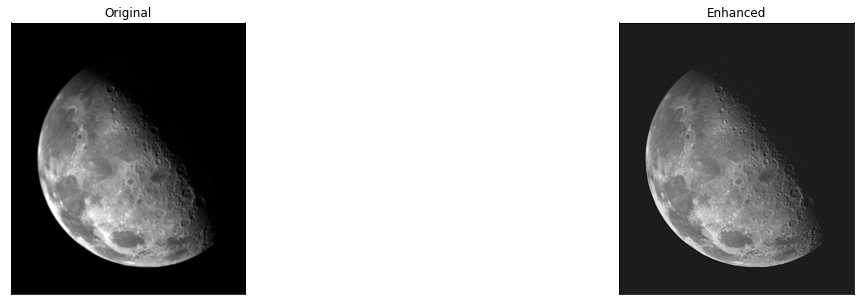

In [28]:
# QUESTION 2
moon = getImage('blurry_moon.tif')
r, c = moon.shape
# zero pad image
P, Q = 2*r, 2*c
moon_pad = cv2.copyMakeBorder(moon, 0, P-r, 0, Q-c, cv2.BORDER_CONSTANT, value = 0)
F = np.fft.fftshift(np.fft.fft2(moon_pad))
# use Gaussian high pass filter
D0 = 160
G = np.zeros((P, Q))
for u in range(P):
    for v in range(Q):
        D = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
        G[u][v] = 1 - np.exp((-D**2)/(2*(D0**2)))
# apply high boost filtering/high frequency emphasis filtering
k1 = 2
k2 = 3
H = k1 + k2*G
# apply filter
filter = np.multiply(H, F)
final = np.real(np.fft.ifft2(np.fft.fftshift(filter)))
f = final[0:r, 0:c]

# plt.imshow(G, cmap="gray")
# plt.title("Gaussian highpass filter")
# plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
# plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
# plt.show()
# plt.imshow(H, cmap="gray")
# plt.title("High-frequency emphasis filter")
# plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
# plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
# plt.show()
# plt.imshow(f, cmap="gray")
# plt.title("Enhanced image")
# plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
# plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
# plt.show()

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Original')
ax[0].imshow(moon, cmap="gray")
ax[1].set_title('Enhanced')
ax[1].imshow(f, cmap="gray")

<ipython-input-42-d43260396781>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum = np.array(cc*np.log(1 + np.abs(f)), dtype=np.uint8)
<ipython-input-42-d43260396781>:28: RuntimeWarning: divide by zero encountered in double_scalars
  H[u][v] = H[u][v] * (1/(1 + (D0k/Dk)**n))*(1/(1 + (D0k/D_k)**n))
<ipython-input-42-d43260396781>:36: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered = np.array(ccc*np.log(1 + np.abs(filter)), dtype=np.uint8)


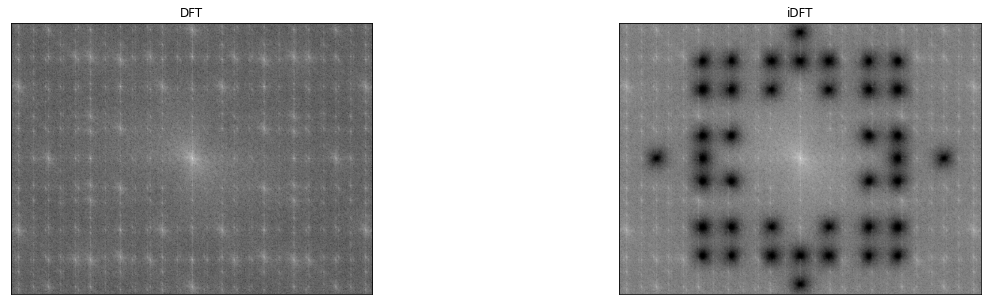

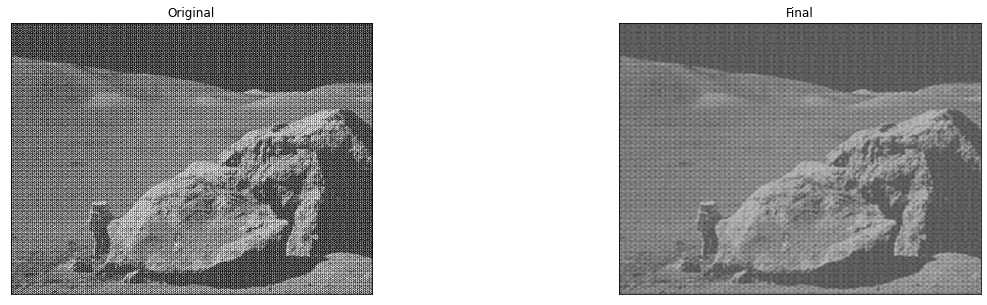

In [42]:
# QUESTION 5
imsQ5 = ['moon_walk.jpg', 'florida.jpg', 'head_ct.tif']
moonwalk = getImage(imsQ5[0])
florida = getImage(imsQ5[1])
ct = getImage(imsQ5[2])

f = np.fft.fftshift(np.fft.fft2(moonwalk))
# display purposes
Y = np.log(1 + f)
cc = 255/np.max(Y)
spectrum = np.array(cc*np.log(1 + np.abs(f)), dtype=np.uint8)

# 630 x 474 => 315, 237
r, c = moonwalk.shape
H = np.ones((r, c))
D0k = 30
n = 5
# centres of highpass filters
uks = [120, 120, 40, 40, 0, 120, 120, 170, 170, 170, 170, 220, 120, 120, 40, 40, 0, 170, 170, 170, 120, 75, 75]
vks = [50, -50, 120, -120, 250, 120, -120, 170, 120, -170, 0, 0, 170, -170, 170, -170, 170, 50, -50, -120, 0, 170, 120]
for i in range(len(uks)):
    for u in range(r):
        for v in range(c):
            uk = uks[i]
            vk = vks[i]
            Dk = np.sqrt((u - r/2 - uk)**2 + (v - c/2 - vk)**2)
            D_k = np.sqrt((u - r/2 + uk)**2 + (v - c/2 + vk)**2)
            H[u][v] = H[u][v] * (1/(1 + (D0k/Dk)**n))*(1/(1 + (D0k/D_k)**n))
# plt.imshow(H, cmap="gray")
# plt.show()
filter = np.multiply(H, f)
final = np.real(np.fft.ifft2(np.fft.fftshift(filter)))
# display purposes
Yy = np.log(1 + filter)
ccc = 255/np.max(Yy)
filtered = np.array(ccc*np.log(1 + np.abs(filter)), dtype=np.uint8)

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('DFT')
ax[0].imshow(spectrum, cmap="gray")
ax[1].set_title('iDFT')
ax[1].imshow(filtered, cmap="gray")

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Original')
ax[0].imshow(moonwalk, cmap="gray")
ax[1].set_title('Final')
ax[1].imshow(final, cmap="gray")

<ipython-input-9-f646e59852f7>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum = np.array(cc*np.log(1 + np.abs(f)), dtype=np.uint8)


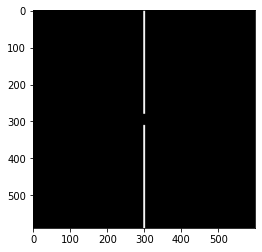

<ipython-input-9-f646e59852f7>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered = np.array(ccc*np.log(1 + np.abs(filter)), dtype=np.uint8)


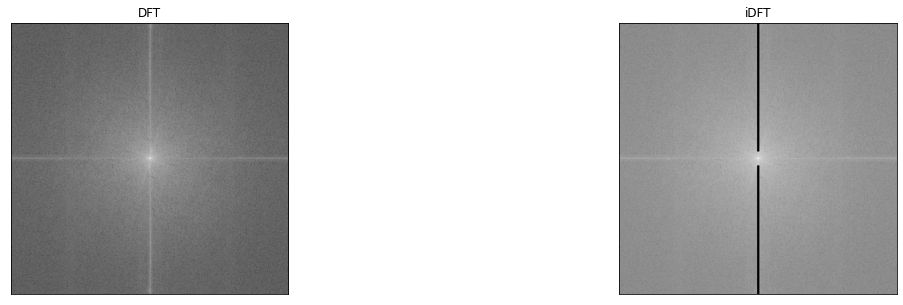

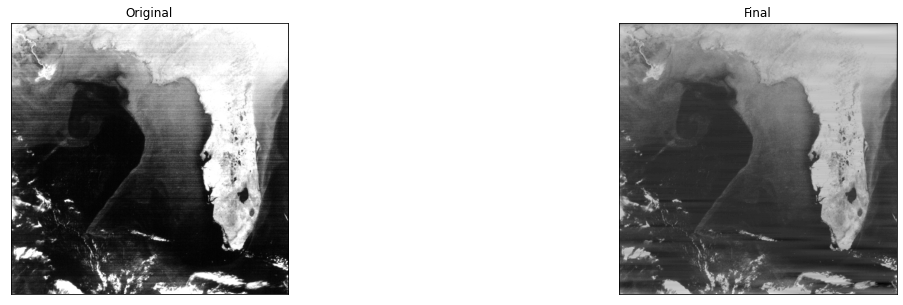

In [9]:
f = np.fft.fftshift(np.fft.fft2(florida))
# display purposes
Y = np.log(1 + f)
cc = 255/np.max(Y)
spectrum = np.array(cc*np.log(1 + np.abs(f)), dtype=np.uint8)
r, c = florida.shape
Hh = np.zeros((r, c)) + 255
Hh[0:280, 298:303] = 0
Hh[310:r, 298:303] = 0
plt.imshow(1-Hh, cmap="gray")
plt.show()

filter = np.multiply(Hh, f)
final = np.real(np.fft.ifft2(np.fft.fftshift(filter)))
# display purposes
Yy = np.log(1 + filter)
ccc = 255/np.max(Yy)
filtered = np.array(ccc*np.log(1 + np.abs(filter)), dtype=np.uint8)

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('DFT')
ax[0].imshow(spectrum, cmap="gray")
ax[1].set_title('iDFT')
ax[1].imshow(filtered, cmap="gray")

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Original')
ax[0].imshow(florida, cmap="gray")
ax[1].set_title('Final')
ax[1].imshow(final, cmap="gray")

<ipython-input-39-e84cdfa86661>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum = np.array(cc*np.log(1 + np.abs(f)), dtype=np.uint8)


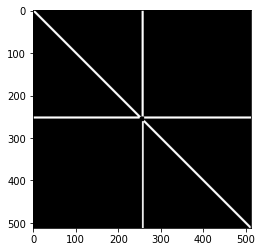

<ipython-input-39-e84cdfa86661>:34: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered = np.array(ccc*np.log(1 + np.abs(filter)), dtype=np.uint8)


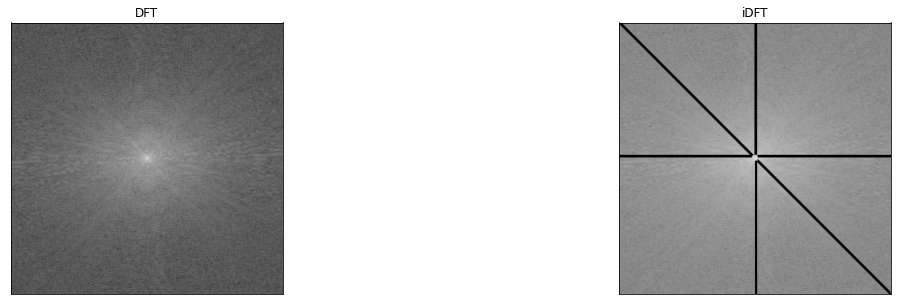

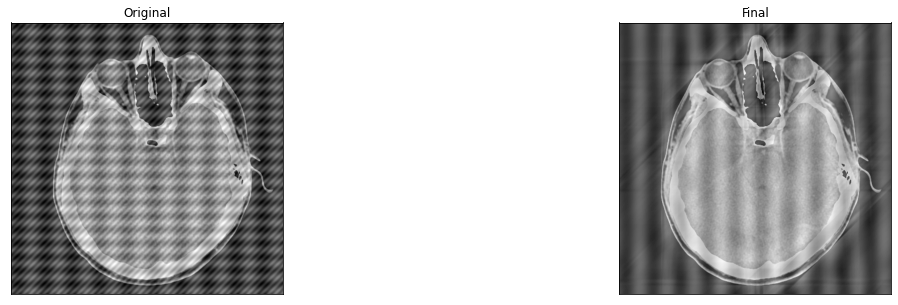

In [39]:
f = np.fft.fftshift(np.fft.fft2(ct))
# display purposes
Y = np.log(1 + f)
cc = 255/np.max(Y)
spectrum = np.array(cc*np.log(1 + np.abs(f)), dtype=np.uint8)

r, c = ct.shape
H = np.zeros((r, c)) + 255
H[250:255, 0:250] = 0
H[250:255, 260:c] = 0
H[0:250, 255:260] = 0
H[260:r, 256:260] = 0
for i in range(r):
    for j in range(c):
        if i == j:
            H[i][j] = 0
            if j > 2:
                H[i][j-1] = 0
                H[i][j-2] = 0
                H[i][j-3] = 0
            if j < c-3:
                H[i][j+1] = 0
                H[i][j+2] = 0
                H[i][j+3] = 0
H[int(r/2) - 5: int(r/2) + 5, int(c/2) - 5: int(c/2) + 5] = 255
plt.imshow(1-H, cmap="gray")
plt.show()

filter = np.multiply(H, f)
final = np.real(np.fft.ifft2(np.fft.fftshift(filter)))
# display purposes
Yy = np.log(1 + filter)
ccc = 255/np.max(Yy)
filtered = np.array(ccc*np.log(1 + np.abs(filter)), dtype=np.uint8)

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('DFT')
ax[0].imshow(spectrum, cmap="gray")
ax[1].set_title('iDFT')
ax[1].imshow(filtered, cmap="gray")

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Original')
ax[0].imshow(ct, cmap="gray")
ax[1].set_title('Final')
ax[1].imshow(final, cmap="gray")